In [2]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re
import string
import unidecode

In [17]:
notes_df = pd.read_csv('note classification\\Cleaned_Notes.csv')

def remove_accented_chars(text):
    text = unidecode.unidecode(text)
    return text
def remove_numbers(text): 
    result = re.sub(r'\d+', '', text) 
    return result
def remove_slash_with_space(text): 
    return text.replace('\\', " ")
def remove_punctuation(text): 
    translator = str.maketrans('', '', string.punctuation) 
    return text.translate(translator) 
def text_lowercase(text): 
    return text.lower()     
def remove_whitespace(text): 
    return  " ".join(text.split()) 
def remove_stopwords(text): 
    stop_words = set(stopwords.words("english")) 
    word_tokens = word_tokenize(text) 
    filtered_text = [word for word in word_tokens if word not in stop_words] 
    return ' '.join(filtered_text)
def stem_words(text): 
    stemmer = PorterStemmer() 
    word_tokens = word_tokenize(text) 
    stems = [stemmer.stem(word) for word in word_tokens] 
    return ' '.join(stems)
def lemmatize_words(text): 
    lemmatizer = WordNetLemmatizer() 
    word_tokens = word_tokenize(text) 
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens] 
    return ' '.join(lemmas) 


def perform_preprocessing(text):
    text = remove_accented_chars(text)
    text = remove_numbers(text)
    text = remove_stopwords(text)
    text = text_lowercase(text)
    text = remove_slash_with_space(text)
    text = remove_punctuation(text)
    text = stem_words(text)
    text = lemmatize_words(text)
    text = remove_whitespace(text)
    return text

# Apply the preprocessing function to each segment
notes_df['Segment1_Notes'] = notes_df['Segment1_Notes'].apply(perform_preprocessing)
notes_df['Segment2_Notes'] = notes_df['Segment2_Notes'].apply(perform_preprocessing)
notes_df['Segment3_Notes'] = notes_df['Segment3_Notes'].apply(perform_preprocessing)
notes_df['Segment4_Notes'] = notes_df['Segment4_Notes'].apply(perform_preprocessing)

notes_df.head()

,Experiment,Topic,ID,Segment1_Notes,Segment2_Notes,Segment3_Notes,Segment4_Notes
0,1,Physics,6266293,laser invent earli th centuri follow einstein ...,make laser involv two main part load atom elec...,differ type lightenergi exist quanta repres sm...,the film goldfing one first exposur gener popu...
1,1,Physics,6416079,laser invent earli th centuri build einstein s...,to make laser need two basic part load atom kn...,laser light come variou type includ solidst ga...,laser use divers widespread carbon dioxid lase...
2,1,Physics,6265686,the maser invent charl town arthur schawlow in...,to make laser load atom electron someth stimul...,there differ type laser light form electromagn...,laser use divers widespread instanc carbon dio...
3,1,Physics,6260581,the histori laser begin earli nt einstein s in...,to make laser beam load atom electron stimul r...,laser categor sever type base medium use solid...,jame bond famous featur laser one adventur gol...
4,1,Physics,6269286,laser develop maser like laser invis invent to...,red laser make rubi crystal flash tube wrap ar...,energi exist quantum laser light monochromat c...,laser precis easi use cut util industri cut we...


In [18]:
train_df = pd.read_csv('note classification\\train.csv')

train_df['IdeaUnit'] = train_df['IdeaUnit'].apply(perform_preprocessing)

train_df.head()

,Topic,ID,Segment,IdeaUnit,label
0,ComputerScience,6260226,1,declar knowledg factual statement,1
1,ComputerScience,6260226,1,imper knowledg solv problem accomplish task,1
2,ComputerScience,6260226,1,algorithm instruct step complet specif order,1
3,ComputerScience,6260226,1,algorithm outlin begin middl end,0
4,ComputerScience,6260226,1,algorithm contain loop instruct tell program r...,1


In [ ]:
similarity_df = pd.DataFrame(columns=['Similarity', 'Label'])

for index, row in train_df.iterrows():
    print(row['Topic'], row['ID'], row['IdeaUnit']) 
    
    matching_row = notes_df[(notes_df['Topic'] == row['Topic']) & (notes_df['ID'] == row['ID'])]
    if not matching_row.empty:
       
        # print("Matching row found in notes_df:")
        # print(matching_row[['Segment1_Notes', 'Segment2_Notes', 'Segment3_Notes', 'Segment4_Notes']])
        
        # Print the first 5 rows of the matching row
        # for col in ['Segment1_Notes', 'Segment2_Notes', 'Segment3_Notes', 'Segment4_Notes']:
        #     print(f"{col}: {matching_row[col].values[0]}")
            
        segment_idea = matching_row[f'Segment{row["Segment"]}_Notes'].values[0]
        student_note = row['IdeaUnit']
        print("Segment Idea:", segment_idea)
        print("Student Note:", student_note)
        
                
        # Find the similarity between the two segments through Jaccard Similarity
        segment_words = set(segment_idea.split())
        student_words = set(student_note.split())
        common_words = segment_words.intersection(student_words)
        similarity = len(common_words) / (len(segment_words) + len(student_words) - len(common_words)) if (len(segment_words) + len(student_words) - len(common_words)) > 0 else 0
        
        print("Similarity:", similarity)
        
        # Store the similarity and label in the similarity_df
        similarity_df = similarity_df._append({'Similarity': similarity, 'Label': row['label']}, ignore_index=True)
       
    else:
        print("No matching row found for index:", index)  

ComputerScience 6260226 declar knowledg factual statement
Segment Idea: declar knowledg consist factual statement wherea imper knowledg compris howto statement express algorithm step exact order perform comput an algorithm contain loop tell program start repeat process must includ termin code if termin code miss infinit loop occur caus program run forev a fix program machin execut algorithm wherea store program comput advanc concept
Student Note: declar knowledg factual statement
Similarity: 5.0230601312971554e-160
ComputerScience 6260226 imper knowledg solv problem accomplish task
Segment Idea: declar knowledg consist factual statement wherea imper knowledg compris howto statement express algorithm step exact order perform comput an algorithm contain loop tell program start repeat process must includ termin code if termin code miss infinit loop occur caus program run forev a fix program machin execut algorithm wherea store program comput advanc concept
Student Note: imper knowledg sol

c:\Users\rohai\anaconda3\envs\nlp\lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\rohai\anaconda3\envs\nlp\lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\rohai\AppData\Local\Temp\ipykernel_9668\2867503854.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exc

In [20]:
similarity_df.head()

,Similarity,Label
0,5.023060e-160,1.0
1,2.542691e-158,1.0
2,5.139193e-235,1.0
3,6.755848e-236,0.0
4,8.019036e-81,1.0


c:\Users\rohai\anaconda3\envs\nlp\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rohai\anaconda3\envs\nlp\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rohai\anaconda3\envs\nlp\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\roha

Best Threshold: 0.01
Best Accuracy: 0.5137
Best F1 Score: 0.3487
Best Precision: 0.2639
Best Recall: 0.5137


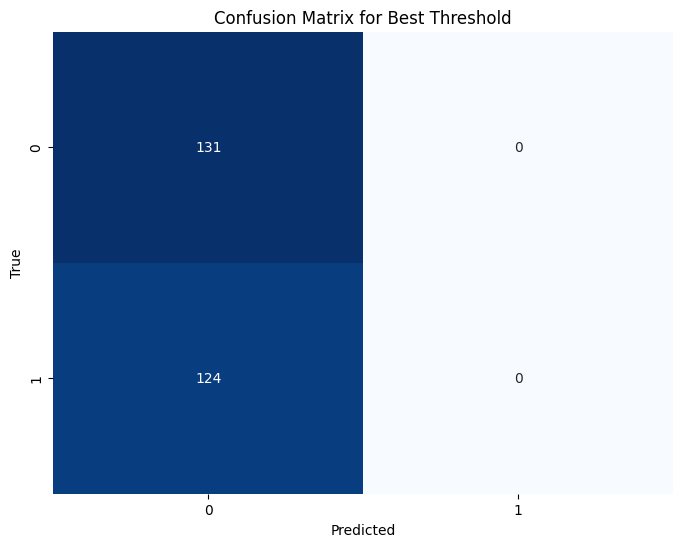

In [21]:
# find the best threshold for the similarity score from the similarity_df by iterating through different thresholds
thresholds = [i * 0.01 for i in range(101)]
best_threshold = None
best_accuracy = 0.0
best_f1_score = 0.0
best_precision = 0.0
best_recall = 0.0



from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    
    return accuracy, f1, precision, recall

# Iterate through different thresholds to find the best one
for threshold in thresholds:
    # Create a binary prediction based on the threshold
    similarity_df['Predicted'] = (similarity_df['Similarity'] >= threshold).astype(int)
    
    # Evaluate the model
    accuracy, f1, precision, recall = evaluate_model(similarity_df['Label'], similarity_df['Predicted'])
    
    # Check if this is the best threshold so far
    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold
        best_accuracy = accuracy
        best_precision = precision
        best_recall = recall
        
# Print the best threshold and its corresponding metrics
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best Accuracy: {best_accuracy:.4f}")
print(f"Best F1 Score: {best_f1_score:.4f}")
print(f"Best Precision: {best_precision:.4f}")
print(f"Best Recall: {best_recall:.4f}")

# Plot the confusion matrix for the best threshold
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Create a binary prediction based on the best threshold
similarity_df['Predicted'] = (similarity_df['Similarity'] >= best_threshold).astype(int)

# Plot the confusion matrix for the best threshold
plot_confusion_matrix(similarity_df['Label'], similarity_df['Predicted'], title='Confusion Matrix for Best Threshold')


In [14]:
test_df = pd.read_csv('note classification\\test.csv', encoding='cp1252')

test_df = test_df.dropna(subset=['label'])

test_df['IdeaUnit'] = test_df['IdeaUnit'].apply(perform_preprocessing)

test_df.head()

,Experiment,Topic,ID,Segment,IdeaUnit,label
0,2,ComputerScience,6260230,1,declar knowledg factual statement,1.0
1,2,ComputerScience,6260230,1,imper knowledg solv problem accomplish task,1.0
2,2,ComputerScience,6260230,1,algorithm instruct step complet specif order,0.0
3,2,ComputerScience,6260230,1,algorithm outlin begin middl end,0.0
4,2,ComputerScience,6260230,1,algorithm contain loop instruct tell program r...,1.0


In [15]:
test_preds = pd.DataFrame(columns=['Similarity', 'Label'])

for index, row in test_df.iterrows():
    # print(row['Topic'], row['ID'], row['IdeaUnit']) 
    
    matching_row = notes_df[(notes_df['Topic'] == row['Topic']) & (notes_df['ID'] == row['ID'])]
    if not matching_row.empty:
            
        segment_idea = matching_row[f'Segment{row["Segment"]}_Notes'].values[0]
        student_note = row['IdeaUnit']
        # print("Segment Idea:", segment_idea)
        # print("Student Note:", student_note)
        
        # Find the similarity between the two segments
        segment_words = set(segment_idea.split())
        student_words = set(student_note.split())
        
        common_words = segment_words.intersection(student_words)
        
        similarity = len(common_words) / (len(segment_words) + len(student_words) - len(common_words)) if (len(segment_words) + len(student_words) - len(common_words)) > 0 else 0
        # print("Similarity:", similarity)
        
        test_preds = test_preds._append({'Similarity': similarity, 'Label': row['label']}, ignore_index=True)
       
    else:
        print("No matching row found for index:", index)  

C:\Users\rohai\AppData\Local\Temp\ipykernel_9668\573507131.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  test_preds = test_preds._append({'Similarity': similarity, 'Label': row['label']}, ignore_index=True)


Test Accuracy: 0.6444
Test F1 Score: 0.5523
Test Precision: 0.6129
Test Recall: 0.6444


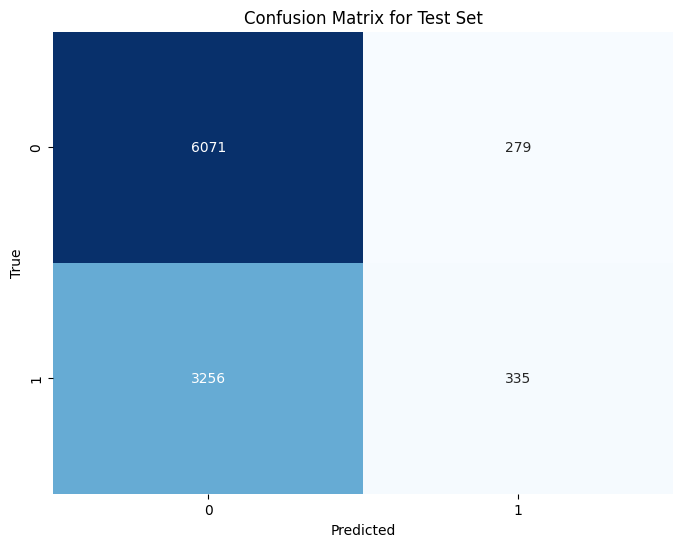

In [16]:
preds = (test_preds['Similarity'] >= best_threshold).astype(int)

accuracy, f1, precision, recall = evaluate_model(test_preds['Label'], preds)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")

plot_confusion_matrix(test_preds['Label'], preds, title='Confusion Matrix for Test Set')